In [1]:
# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
from learntools.time_series.utils import plot_periodogram, seasonal_plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

In [2]:
grace_dir = Path('../input/grace-simulated-accelerometer-data')

In [3]:
df_A_2 = pd.read_csv(grace_dir/'ACC1B_2005-05-02_A_MDC-02.asc',header=None, sep=' ', skiprows=23)
df_A_3 = pd.read_csv(grace_dir/'ACC1B_2005-05-03_A_MDC-02.asc',header=None, sep=' ', skiprows=23)

In [4]:
df_A_2.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)
df_A_3.drop([1,5,6,7,8,9,10,11],axis='columns', inplace=True)

In [5]:
y_x_2 = df_A_2.loc[:, 2]  # target
y_x_3 = df_A_3.loc[:, 2]  # target

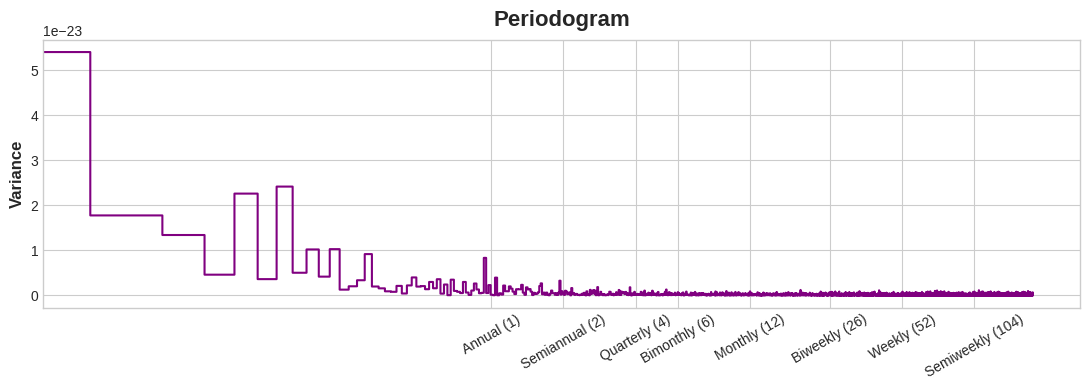

In [6]:
plot_periodogram(y_x_2);

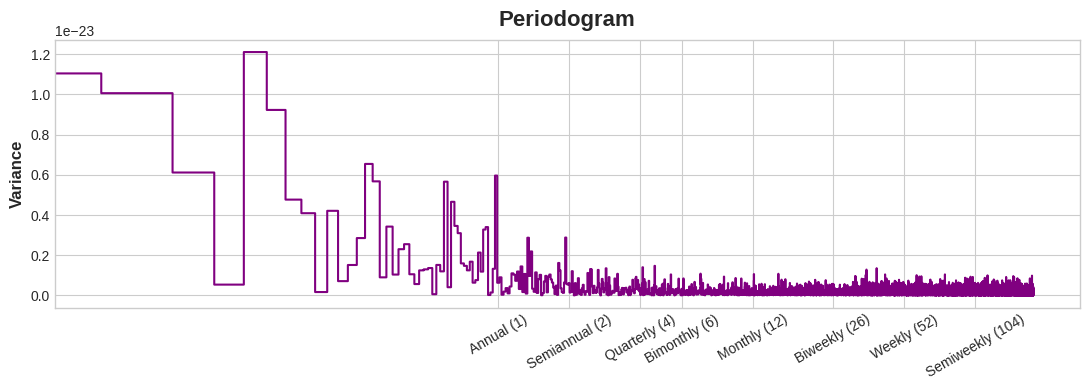

In [7]:
plot_periodogram(y_x_3);

In [8]:
from statsmodels.tsa.deterministic import Fourier

In [9]:
y_x_2.index

RangeIndex(start=0, stop=17280, step=1)

In [10]:
fourier = Fourier(period=2000,order=1)
dp = DeterministicProcess(
    index=y_x_2.index,
    constant=False,
    order=1,
    period=4000,
    seasonal=False,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,
)
X = dp.in_sample() 

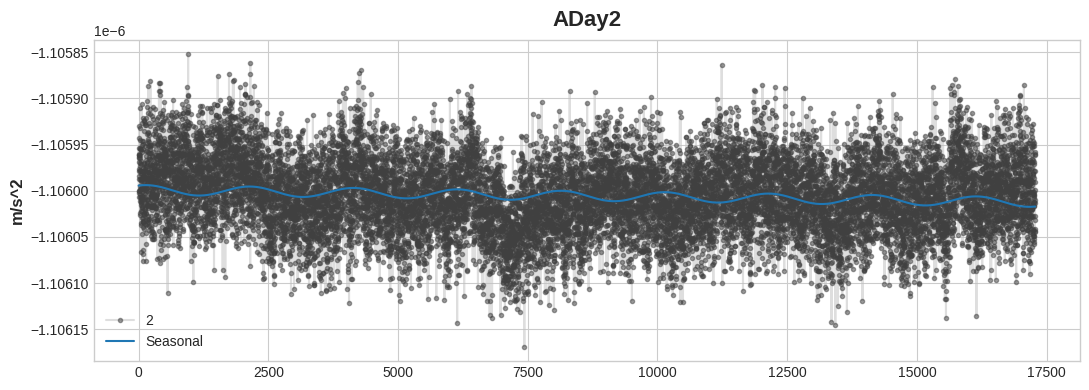

In [11]:
model = LinearRegression().fit(X, y_x_2)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y_x_2.plot(**plot_params, alpha=0.5, title="ADay2", ylabel="m/s^2")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

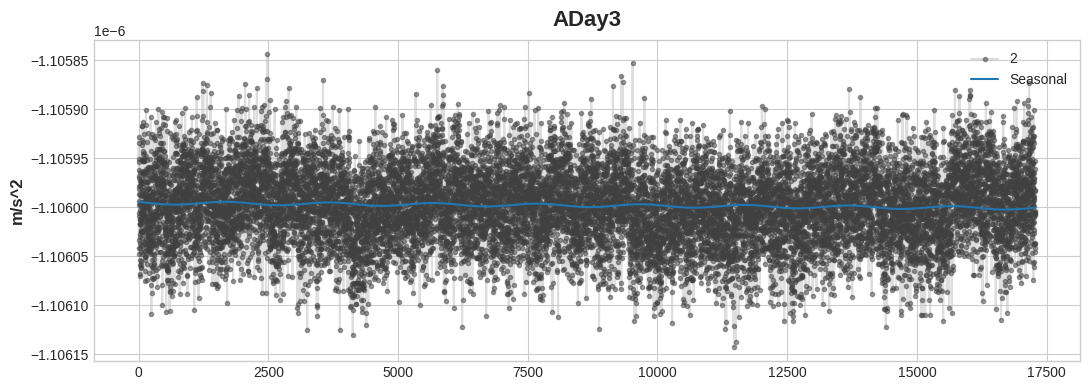

In [12]:
model = LinearRegression().fit(X, y_x_3)
y_pred = pd.Series(
    model.predict(X),
    index=X.index,
    name='Fitted',
)

y_pred = pd.Series(model.predict(X), index=X.index)
ax = y_x_3.plot(**plot_params, alpha=0.5, title="ADay3", ylabel="m/s^2")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax.legend();

Fourier or seasonality is not working for GRACE ACC, because seasonality is different in each day.